# Credit Default Swaps Data Sets

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

## 1. Exploratory Data Analysis

In this section we will explore the content of the datasets. 

### 1.1 Quotes Dataset

This dataset contains a list of quotes for credit index swaps indices.

In [2]:
df_quotes = pd.read_csv('Quotes.csv', header = None)
print('Quotes shape: ' +str(df_quotes.shape))

Quotes shape: (41808694, 11)


We have in the quotes data frame access to the data of 41 million quotes which are defined according to 10 different variables. 

In [3]:
df_quotes.head()

,0,1,2,3,4,5,6,7,8,9,10
0,ADGB-2412-100,2020-03-09 14:02:43.697,Market,Bid,10000000.0,85.0,100.696249,-0.696249,0.0,BARX,NaN
1,ADGB-2412-100,2020-03-09 14:02:43.697,Market,Offer,10000000.0,95.0,100.231346,-0.231346,0.0,BARX,NaN
2,ADGB-2412-100,2020-03-09 14:04:09.540,Market,Bid,10000000.0,85.0,100.696249,-0.696249,0.0,BARX,NaN
3,ADGB-2412-100,2020-03-09 19:00:09.847,Market,Bid,10000000.0,85.0,100.696249,-0.696249,0.0,BARX,NaN
4,ADGB-2412-100,2020-03-09 19:00:09.847,Market,Offer,10000000.0,95.0,100.231346,-0.231346,0.0,BARX,NaN


The 10 fields contain only floats and objects

In [4]:
df_quotes.dtypes

0      object
1      object
2      object
3      object
4     float64
5     float64
6     float64
7     float64
8     float64
9      object
10    float64
dtype: object

The last row is empty

In [5]:
df_quotes.isna().sum()/df_quotes.count()

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.021715
5     0.027062
6     0.023770
7     0.023770
8     0.023770
9     0.000000
10         inf
dtype: float64

We remove the last row and assign the right column names to the field values

In [6]:
df_quotes.drop(10, axis=1, inplace = True)
df_quotes.columns = ['ticker', 'valueDate', 'priceType', 'priceDirection', 'size', 'spread', 'price', 'upfront', 'switchStatus', 'firm']
df_quotes['valueDate'] = pd.to_datetime(df_quotes['valueDate'])

Since we are dealing with a timeseries problem we set the index to the datetime values.

In [7]:
df_quotes.set_index('valueDate', inplace = True)
df_quotes.head()

,ticker,priceType,priceDirection,size,spread,price,upfront,switchStatus,firm
valueDate,,,,,,,,,
2020-03-09 14:02:43.697,ADGB-2412-100,Market,Bid,10000000.0,85.0,100.696249,-0.696249,0.0,BARX
2020-03-09 14:02:43.697,ADGB-2412-100,Market,Offer,10000000.0,95.0,100.231346,-0.231346,0.0,BARX
2020-03-09 14:04:09.540,ADGB-2412-100,Market,Bid,10000000.0,85.0,100.696249,-0.696249,0.0,BARX
2020-03-09 19:00:09.847,ADGB-2412-100,Market,Bid,10000000.0,85.0,100.696249,-0.696249,0.0,BARX
2020-03-09 19:00:09.847,ADGB-2412-100,Market,Offer,10000000.0,95.0,100.231346,-0.231346,0.0,BARX


### 1.2 Quotes Universe Dataset

This dataset contains information for each different type of credit index swaps emitted over the years

In [8]:
df_universe = pd.read_csv('QuotesUniverse.csv', header = None, index_col = False)
print('Quotes Universe shape: ' +str(df_universe.shape))

Quotes Universe shape: (49391, 11)


We have access to around 50 thousand types of credit indices which can be defined according to 11 different variables. The variables obtained are either floats or objects.

In [9]:
df_universe.dtypes

0      object
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
dtype: object

Certain fields have a large amount of data missing meaning that they will not be able to bring accurate information

In [10]:
df_universe.isna().sum()/df_universe.count()

0     0.000000
1     0.139985
2     0.140459
3     0.139880
4     0.439887
5     0.139985
6     0.142490
7     0.139880
8     0.139880
9     0.000000
10    0.139880
dtype: float64

We name the columns according to the index given by Hellebore and we select the tickers which are heavily traded upon=, those are the CDX and ITX indeces. 

In [11]:
df_universe.columns = ['ticker_universe','creditCurve', 'label', 'endDate', 'maturity','seniority','docClause','currency', 'coupon','instrument','family']
df_universe = df_universe.loc[df_universe['family'].isin(['CDXEM','CDXIG', 'CDXHY', 'ITXES', 'ITXEX', 'ITXEB'])]
df_universe['endDate'] = pd.to_datetime(df_universe['endDate'])

In [12]:
df_universe.head()

,ticker_universe,creditCurve,label,endDate,maturity,seniority,docClause,currency,coupon,instrument,family
4807,CDXEM025,CDXEM25,CDX.EM.25,2026-06-20,10Y,SEN,CR14,USD,100.0,CIS,CDXEM
4808,CDXEM517,CDXEM17,MARKIT CDX.EM.17 06/17*,2017-06-20,5Y,Sen,CR14,USD,500.0,CIS,CDXEM
4809,CDXEM523,CDXEM23,CDX.EM.23,2020-06-20,5Y,SEN,CR14,USD,100.0,CIS,CDXEM
4813,CDXEM728,CDXEM28,CDX.EM.28,2024-12-20,7Y,SEN,CR14,USD,100.0,CIS,CDXEM
4815,CDXHY523,CDXHY23,CDX.NA.HY.23,2019-12-20,5Y,SEN,XR14,USD,500.0,CIS,CDXHY


### 1.3 Trades Dateset

The third dataset is the trades which is used by the company to monitor all the trades which have been performed by the company on a credit index swap.

In [13]:
df_trades = pd.read_csv('Trades.csv', header= None)
print('Trades shape: ' +str(df_trades.shape))

Trades shape: (1468715, 11)


There are 1.5 million trades which have been registered on the trades database.

In [14]:
df_trades.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CDXEM530,2018-12-11 13:20:39.000,Trade,Level,3000000.0,204.931700,95.35,4.65,0.0,Dtcc SEF,NaN
1,CDXEM530,2018-12-11 13:21:36.000,Trade,Level,10000000.0,204.698145,95.36,4.64,0.0,Dtcc OTC,NaN
2,CDXEM530,2018-12-11 13:33:06.000,Trade,Level,10000000.0,205.632580,95.32,4.68,0.0,Dtcc OTC,NaN
3,CDXEM530,2018-12-11 13:45:45.000,Trade,Level,10000000.0,204.698145,95.36,4.64,0.0,Dtcc SEF,NaN
4,CDXEM530,2018-12-11 13:45:53.000,Trade,Level,10000000.0,204.698145,95.36,4.64,0.0,Dtcc SEF,NaN


The last column is empty

In [15]:
df_trades.isna().sum()/df_trades.count()

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000016
5     0.029456
6     0.004573
7     0.004599
8     0.004573
9     0.000000
10         inf
dtype: float64

We drop the last field where there are only null values, name the columns and set index to the datetime values.

In [16]:
df_trades.drop(10, axis=1, inplace = True)
df_trades.columns = ['ticker', 'valueDate', 'priceType', 'priceDirection', 'size', 'spread', 'price', 'upfront', 'switchStatus', 'firm']
df_trades['valueDate'] = pd.to_datetime(df_trades['valueDate'])
df_trades['valueDate_hour'] = df_trades['valueDate']
df_trades.sort_index(inplace=True, ascending=True)

Add the information from quotes universe for the credit index swap which is currently being studied.

In [17]:
df_trades = df_trades.merge(df_universe, how='inner', left_on = 'ticker', right_on = 'ticker_universe')
df_trades.set_index('valueDate',inplace=True)
print('Trades shape: ' +str(df_trades.shape))

Trades shape: (1425275, 21)


In [18]:
df_trades.head()

,ticker,priceType,priceDirection,size,spread,price,upfront,switchStatus,firm,valueDate_hour,...,creditCurve,label,endDate,maturity,seniority,docClause,currency,coupon,instrument,family
valueDate,,,,,,,,,,,,,,,,,,,,,
2018-12-11 13:20:39,CDXEM530,Trade,Level,3000000.0,204.931700,95.35,4.65,0.0,Dtcc SEF,2018-12-11 13:20:39,...,CDXEM30,CDX.EM.30,2023-12-20,5Y,SEN,NaN,USD,100.0,CIS,CDXEM
2018-12-11 13:21:36,CDXEM530,Trade,Level,10000000.0,204.698145,95.36,4.64,0.0,Dtcc OTC,2018-12-11 13:21:36,...,CDXEM30,CDX.EM.30,2023-12-20,5Y,SEN,NaN,USD,100.0,CIS,CDXEM
2018-12-11 13:33:06,CDXEM530,Trade,Level,10000000.0,205.632580,95.32,4.68,0.0,Dtcc OTC,2018-12-11 13:33:06,...,CDXEM30,CDX.EM.30,2023-12-20,5Y,SEN,NaN,USD,100.0,CIS,CDXEM
2018-12-11 13:45:45,CDXEM530,Trade,Level,10000000.0,204.698145,95.36,4.64,0.0,Dtcc SEF,2018-12-11 13:45:45,...,CDXEM30,CDX.EM.30,2023-12-20,5Y,SEN,NaN,USD,100.0,CIS,CDXEM
2018-12-11 13:45:53,CDXEM530,Trade,Level,10000000.0,204.698145,95.36,4.64,0.0,Dtcc SEF,2018-12-11 13:45:53,...,CDXEM30,CDX.EM.30,2023-12-20,5Y,SEN,NaN,USD,100.0,CIS,CDXEM


## 2. Trades Exploration

### 2.1 CDS types traded/Day 

Find the number different of versions of cds traded each day

In [19]:
df_trades_timeseries = df_trades.groupby(['family', pd.Grouper(freq='D')]).agg({'ticker': pd.Series.nunique})
df_trades_timeseries.columns = ['NbVersionTickers']

In [20]:
df_trades_timeseries

NbVersionTickers
family valueDate                   
CDXEM  2012-02-13                 1
       2012-03-13                 1
       2012-03-14                 1
       2012-05-14                 1
       2012-05-16                 1
...                             ...
ITXEX  2020-04-02                 1
       2020-04-03                 2
       2020-04-06                 1
       2020-04-07                 1
       2020-04-08                 1

[11492 rows x 1 columns]

In [21]:
df_trades_timeseries.reset_index(inplace=True)
df_trades_timeseries.set_index('valueDate',inplace=True)

We see clearly that for each there is in general a few type of indeces traded

(array([9.048e+03, 1.630e+03, 6.250e+02, 1.120e+02, 5.000e+01, 1.300e+01,
        1.000e+01, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <a list of 10 Patch objects>)

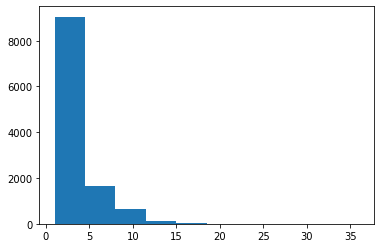

In [22]:
plt.hist(df_trades_timeseries.NbVersionTickers)

### 2.2 Extract latest trades on newest version of CDS

In [23]:
df_trades_merge = df_trades.merge(df_trades_timeseries, how='left', left_on= ['family',  df_trades.index.year,df_trades.index.month,df_trades.index.day], right_on = ['family',  df_trades_timeseries.index.year,df_trades_timeseries.index.month,df_trades_timeseries.index.day])
df_trades_merge.drop(['key_1','key_2','key_3'], axis=1, inplace= True)
df_trades_merge.isna().sum()

ticker                   0
priceType                0
priceDirection           0
size                     4
spread               36382
price                 5157
upfront               5194
switchStatus          5157
firm                     0
valueDate_hour           0
ticker_universe          0
creditCurve              0
label                    0
endDate                  0
maturity                 0
seniority                0
docClause           229891
currency                 0
coupon                   0
instrument               0
family                   0
NbVersionTickers         0
dtype: int64

In [24]:
df_trades_merge.head()

,ticker,priceType,priceDirection,size,spread,price,upfront,switchStatus,firm,valueDate_hour,...,label,endDate,maturity,seniority,docClause,currency,coupon,instrument,family,NbVersionTickers
0,CDXEM530,Trade,Level,3000000.0,204.931700,95.35,4.65,0.0,Dtcc SEF,2018-12-11 13:20:39,...,CDX.EM.30,2023-12-20,5Y,SEN,NaN,USD,100.0,CIS,CDXEM,1
1,CDXEM530,Trade,Level,10000000.0,204.698145,95.36,4.64,0.0,Dtcc OTC,2018-12-11 13:21:36,...,CDX.EM.30,2023-12-20,5Y,SEN,NaN,USD,100.0,CIS,CDXEM,1
2,CDXEM530,Trade,Level,10000000.0,205.632580,95.32,4.68,0.0,Dtcc OTC,2018-12-11 13:33:06,...,CDX.EM.30,2023-12-20,5Y,SEN,NaN,USD,100.0,CIS,CDXEM,1
3,CDXEM530,Trade,Level,10000000.0,204.698145,95.36,4.64,0.0,Dtcc SEF,2018-12-11 13:45:45,...,CDX.EM.30,2023-12-20,5Y,SEN,NaN,USD,100.0,CIS,CDXEM,1
4,CDXEM530,Trade,Level,10000000.0,204.698145,95.36,4.64,0.0,Dtcc SEF,2018-12-11 13:45:53,...,CDX.EM.30,2023-12-20,5Y,SEN,NaN,USD,100.0,CIS,CDXEM,1


We extract the version of the cds and we set the index to the datetime of the quote

In [25]:
df_trades_merge['Version'] = df_trades_merge['ticker'].apply(lambda x: x[-2:])
df_trades_merge['valueDate'] = df_trades_merge['valueDate_hour']
df_trades_merge.set_index('valueDate_hour', inplace = True)

We select the latest version of the cds traded on a specific day

In [26]:
df_version = df_trades_merge.groupby(['family', pd.Grouper(freq='D')]).agg({'Version': 'max'})
df_version.columns = ['MaxVersion']
df_version.reset_index(inplace=True)
df_version.set_index('valueDate_hour', inplace = True)

We add the latest version to the orginal trades dataset

In [27]:
df_trades_merge = df_trades_merge.merge(df_version, how='left', left_on= ['family',  df_trades_merge.index.year,df_trades_merge.index.month,df_trades_merge.index.day], right_on = ['family',  df_version.index.year,df_version.index.month,df_version.index.day])
df_trades_merge.set_index('valueDate',inplace=True)

We Select the trades with the latest version.

In [28]:
df_trades_final = df_trades_merge.query('Version == MaxVersion').copy()
df_trades_final.drop(['key_1', 'key_2', 'key_3'], axis=1, inplace=True)
df_trades_final.sort_index(inplace=True)

### 2.3 Compute Average Spread

Remove spreads with null value

In [29]:
df_trades_final.dropna(subset=['spread'], inplace=True)

Compute daily mean spread

In [30]:
g = df_trades_final.groupby(['family',pd.Grouper(freq='D')])
df_mean = g.apply(lambda x: pd.Series([np.average(x['spread'], weights=x['size'])], index =['weighted_spread']))
df_mean['mean_spread'] = df_trades_final.groupby(['family',pd.Grouper(freq = 'D')]).agg({'spread':'mean'})
df_mean.reset_index(inplace=True)

Compute the number of days between each trade

In [31]:
df_mean['date_diff'] = (df_mean['valueDate']
                        .groupby(df_mean['family'])
                        .diff()
                        .dt.days
                        .fillna(0, downcast='infer'))
df_mean.set_index('valueDate', inplace=True)
df_mean.sort_index(inplace=True, ascending=False)

Plot the number of days between each trade

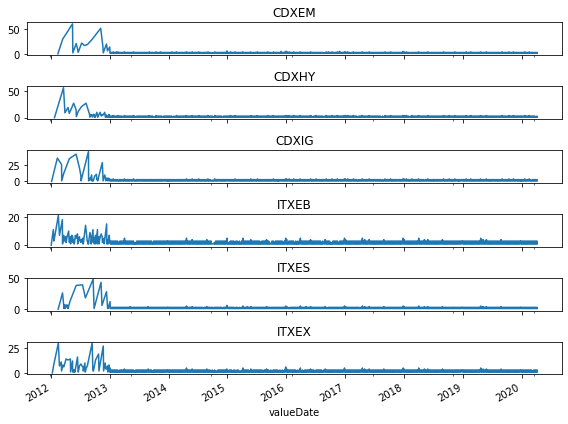

In [32]:
g = df_mean.groupby('family')

fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(8, 6))

for i, (family, d) in enumerate(g):
    ax = d.plot.line(y='date_diff', ax=axes[i], title=family)
    ax.legend().remove()

fig.tight_layout()
plt.savefig('figures/disc.eps')

Remove 2012 data

In [33]:
df_trades_final = df_trades_final.loc[df_trades_final.index>datetime.datetime(2013,1,1,0,0,0),:]
df_trades_final.drop('MaxVersion', axis=1, inplace=True)
df_trades_final.sort_index(inplace=True)

compute mad score

In [34]:
g = df_trades_final.groupby(['family',pd.Grouper(freq='D')])
df_trades_statitics = g.apply(lambda x: pd.Series([np.average(x['spread'], weights=x['size'])], index =['weighted_spread']))
df_trades_statitics['mean_spread'] = df_trades_final.groupby(['family',pd.Grouper(freq = 'D')]).agg({'spread':'mean'})
df_trades_statitics[['spread_mad','spread_median']] = df_trades_final.groupby(['family',pd.Grouper(freq = 'D')]).agg({'spread':['mad','median']})

In [35]:
df_trades_statitics.head()

weighted_spread  mean_spread  spread_mad  spread_median
family valueDate                                                          
CDXEM  2013-01-02       195.454981   196.137538    2.024761       195.4992
       2013-01-03       191.856722   192.269740    1.047772       192.3277
       2013-01-04       191.831021   191.476700    0.489300       191.4767
       2013-01-07       193.833501   194.046000    1.521700       194.4873
       2013-01-08       202.845663   203.094589    1.335751       203.2471

In [36]:
df_trades_final.reset_index(inplace=True)
df_trades_final.reset_index(inplace=True)
df_trades_final.rename(columns = {'index':'TransactionID'}, inplace=True)
df_trades_final.set_index('valueDate', inplace=True)
df_trades_final.sort_index(inplace=True)

Compute the mad score for each trade

In [ ]:
# mad score template
mad1 = lambda x: np.fabs(x - x.median()).median()
df_trades_mad = df_trades_final.groupby('family').rolling(window=100).agg({'spread':[mad1,'median'], 'TransactionID': 'max'}).reset_index()
df_trades_mad.columns = ['family','valueDate','MADRollingSpread','Median','TransactionID']
df_trades_mad.dropna(subset=['Median'], inplace=True)
df_trades_mad['TransactionID'] = df_trades_mad['TransactionID'].astype(int)

Join the newly computed mad score on the trades dataframe

In [ ]:
df_trades_final = df_trades_final.merge(df_trades_mad, how='left', left_on = ['TransactionID'], right_on = ['TransactionID'])
df_trades_final.dropna(subset=['MADRollingSpread','Median'], inplace=True)
df_trades_final['ModifiedZScore'] = 0.6745* (df_trades_final['spread']-df_trades_final['Median'])/df_trades_final['MADRollingSpread']
# Select trades with z scores < 3.5
df_trades_final = df_trades_final.loc[abs(df_trades_final['ModifiedZScore'])<=3.5,:]

In [ ]:
# Cleanup data frame
df_trades_final.set_index('TransactionID',inplace=True)
df_trades_final.drop('family_y', axis=1,inplace=True)
df_trades_final = df_trades_final.rename(columns={'family_x':'family'})

In [ ]:
df_trades_final = df_trades_final.groupby(['family','valueDate']).agg({'spread':'median', 'size': 'median'}).reset_index().set_index('valueDate')

Save dataframe to right environment

In [ ]:
df_trades_final.to_csv('TradesCleaned.csv')